In [22]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [1]:
import altair as alt
from vega_datasets import data
cars = data.cars()

cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

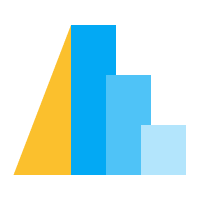

In [72]:
from IPython.display import Image
Image("https://altair-viz.github.io/_static/altair-logo-light.png")

## 1 - Basic Plotting with Altair

- Create a `Chart` object
    - Specify _title, width, height, padding_ etc. 
 
- Choose a `mark`
    - pick the visual element for your chart from _point, area, line, bar_ etc.
        * ``mark_point()`` 
        * ``mark_circle()``
        * ``mark_square()``
        * ``mark_line()``
        * ``mark_area()``
        * ``mark_bar()``
        * ``mark_tick()``
        
        
- `encode` data to visual features 
    - eg. `x='col_1', y='col_2', color='col_3'` etc.
        * `x`: x-axis value
        * `y`: y-axis value
        * ``color``: color of the mark
        * ``opacity``: transparency/opacity of the mark
        * ``shape``: shape of the mark
        * ``size``: size of the mark
        * ``row``: row within a grid of facet plots
        * ``column``: column within a grid of facet plots
    - specify the _type_ to interpret data 
        - Q: quantitative, 
        - O: Ordinal, 
        - N: Nominal, 
        - T: temporal)
    - `x` and `y` can be constructed with `alt.X(), alt.Y(), alt.Bin()` etc
    - add _facetting_ using `row=, column=`
    ---
- add click-drag, pan, zoom to the chart with `.interactive()`    

### Get some data

In [64]:
size_ = 150

df_ = \
DataFrame({'x': range(size_),
           'y': [x for x in np.random.random(size_)]})
df_.head()

x         y
0  0  0.364051
1  1  0.213298
2  2  0.605703
3  3  0.219465
4  4  0.396715

### Step 1: Make a Chart and Pick a Mark 

In [43]:
alt.Chart(data=df_).mark_point()

### Step 2: Encode data

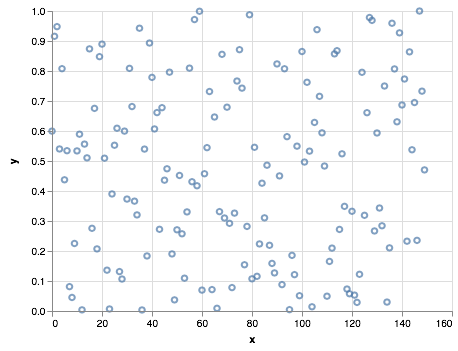

In [44]:
alt.Chart(data=df_).mark_point().encode(x='x', y='y')

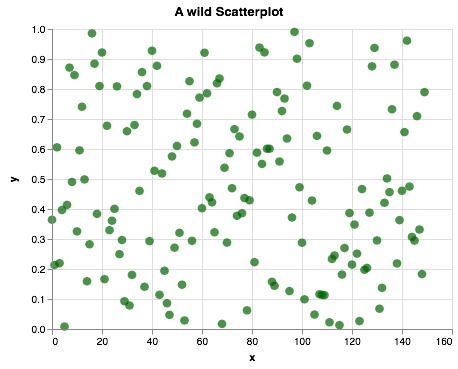

In [67]:
(alt
 .Chart(data=df_, 
        title='A wild Scatterplot')
 .mark_circle(size=75, 
              color='darkgreen')
 .encode(x='x', 
         y='y')
)

### Step 3: Add detail, basic interactivity

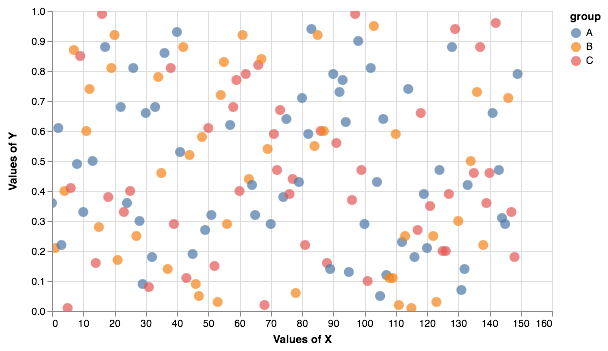

In [100]:
(alt
 .Chart(data=(df_
              .round(2)
              .assign(group = [np.random.choice(list('ABC')) for i in range(size_)])),
        height=300,
        width=500
       )
 .mark_circle(size=100, 
              opacity=0.7,
              color='red')
 .encode(x=alt.X('x', axis=alt.Axis(title='Values of X')), 
         y=alt.Y('y', axis=alt.Axis(title='Values of Y')),
         tooltip=alt.Tooltip('y'),
         color='group'
        )
 .interactive()
)

### Step 4: Change Scale (or limits)

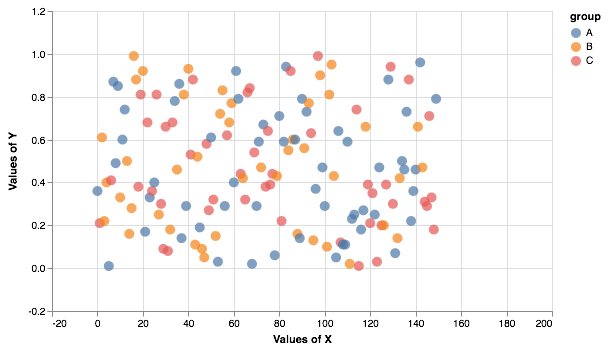

In [142]:
(alt
 .Chart(data=(df_
              .round(2)
              .assign(group = [np.random.choice(list('ABC')) for i in range(size_)])),
        height=300,
        width=500
       )
 .mark_circle(size=100, 
              opacity=0.7,
              color='red')
 .encode(x=alt.X('x', 
                 axis=alt.Axis(title='Values of X'),
                 scale=alt.Scale(domain=[-10, 200])), 
         y=alt.Y('y', 
                 axis=alt.Axis(title='Values of Y'),
                 scale=alt.Scale(domain=[-0.2, 1.2])
                ),
         tooltip=alt.Tooltip('y'),
         color='group'
        )
 .interactive()
)

---
## 2 - Altair Plots with Toy Datasets

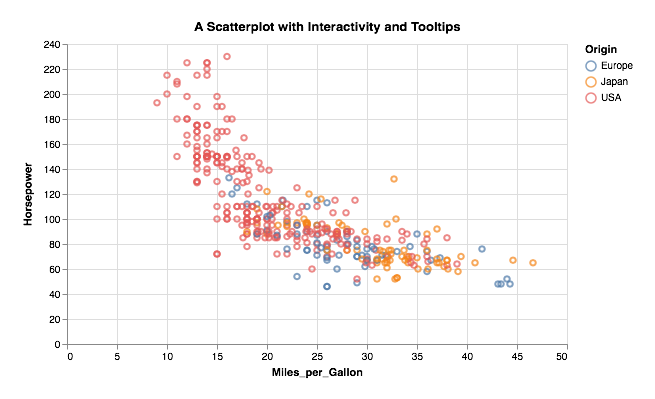

In [102]:
(alt
 .Chart(data=cars, 
        height=300, 
        width=500, 
        padding=20,
        title='A Scatterplot with Interactivity and Tooltips')
 .mark_point()
 .encode(x='Miles_per_Gallon:Q', 
         y='Horsepower:Q',
         color='Origin:N', 
         tooltip='Name')
)

### Histograms are just counts of a binned variable

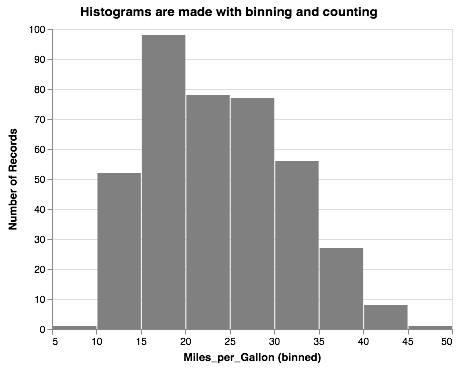

In [126]:
(alt
 .Chart(data=cars, 
        title='Histograms are made with binning and counting')
 .mark_bar(color='gray')
 .encode(x=alt.X('Miles_per_Gallon:Q', bin=True), 
         y='count()')
)

### Don't need a special function for Horizontal bars, just switch the x and y!

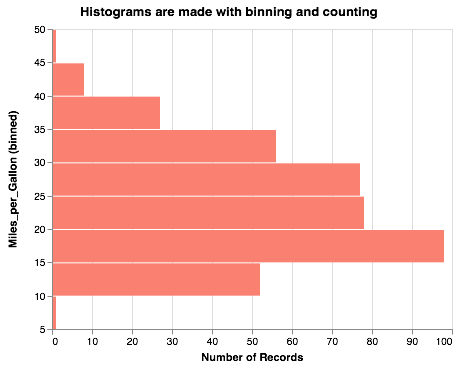

In [125]:
(alt
 .Chart(data=cars, 
        title='Histograms are made with binning and counting')
 .mark_bar(color='salmon')
 .encode(y=alt.Y('Miles_per_Gallon:Q', bin=True), 
         x='count()')
)

### Create Facets with `row`, `column`

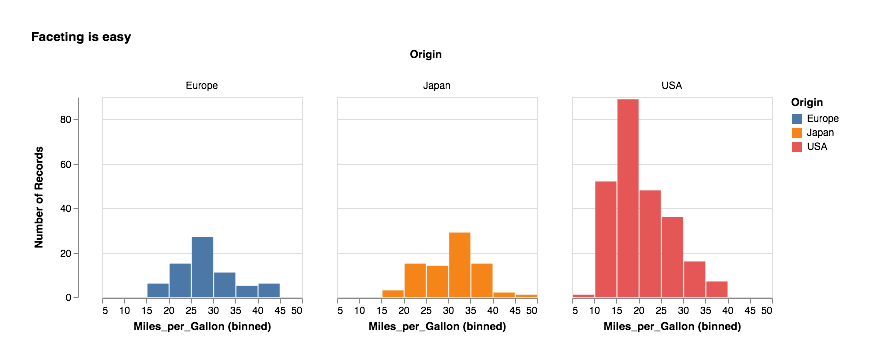

In [4]:
(alt
 .Chart(data=cars, title="Faceting is easy",
        width=200, height=200, padding=30)
 .mark_bar()
 .encode(x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=10)),
         y='count()',
         tooltip='count()',
         color='Origin',
         column='Origin')
)

### Binning and `mark_bar` for Stacked Barplot

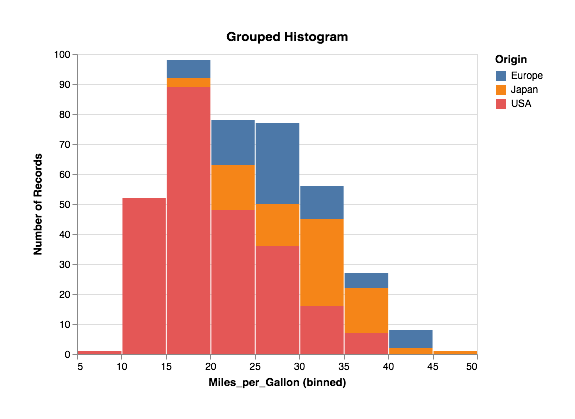

In [3]:
(alt
 .Chart(data=cars, title="Grouped Histogram", 
        width=400, height=300, padding=30)
 .mark_bar()
 .encode(x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=10)),
         y='count()',
         color='Origin')
)

### Binning and `mark_rect()` create Heatmaps

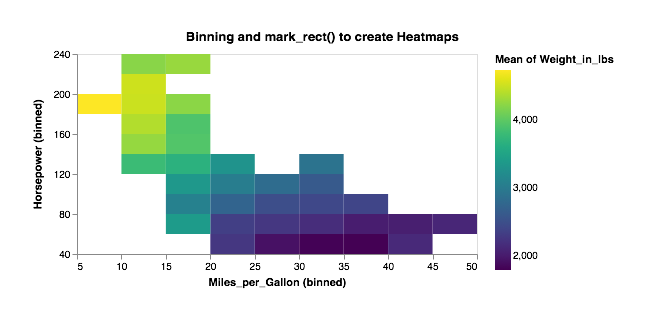

In [5]:
(alt
 .Chart(
     data=cars, 
     title='Binning and mark_rect() to create Heatmaps',
     width=400, 
     height=200, 
     padding=30)
 .mark_rect()
 .encode(
     x=alt.X('Miles_per_Gallon', bin=True),
     y=alt.Y('Horsepower', bin=True),
     color='mean(Weight_in_lbs)')
)

### Time Series with on-the-fly aggregations 

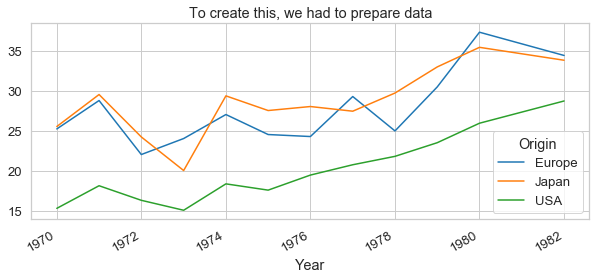

In [128]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

(pd.pivot_table(data=cars, 
               index='Year', 
               columns='Origin', 
               values='Miles_per_Gallon', 
               aggfunc='mean')
.plot(figsize=(10, 4), title='To create this, we had to prepare data')
);

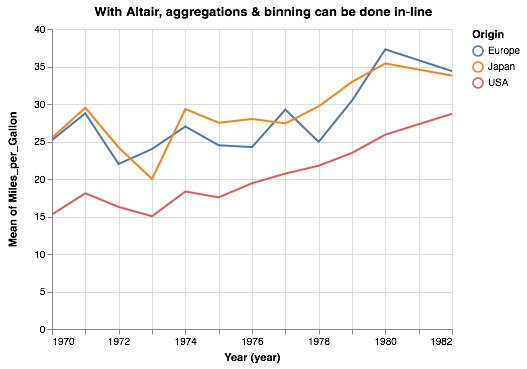

In [122]:
(alt
 .Chart(data=cars, 
        title='With Altair, aggregations & binning can be done in-line')
 .mark_line()
 .encode(x=alt.X('Year', timeUnit='year'),
         y='mean(Miles_per_Gallon):Q', 
         color='Origin:N',
         tooltip='Origin'
))

### Area charts for confidence intervals

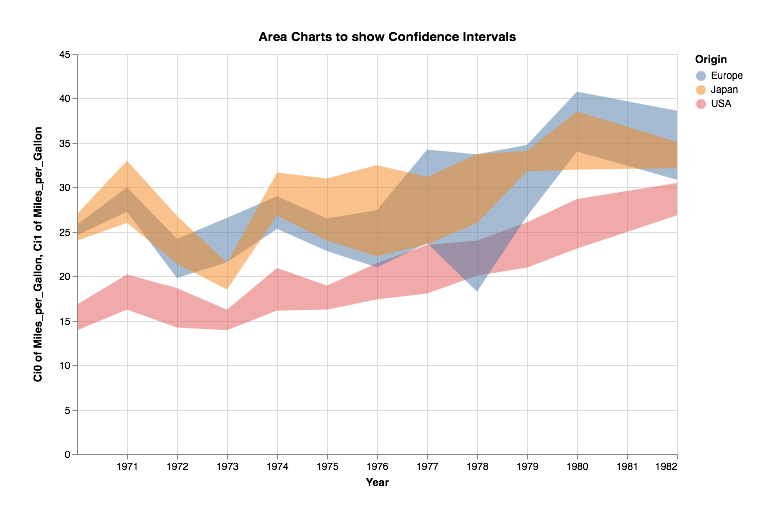

In [7]:
(alt
 .Chart(
     data=cars, 
     title='Area Charts to show Confidence Intervals',
     width=600, 
     height=400, 
     padding=30)
 .mark_area(opacity=0.5)
 .encode(
     x='Year',
     y='ci0(Miles_per_Gallon)',
     y2='ci1(Miles_per_Gallon)',
     color='Origin'
))

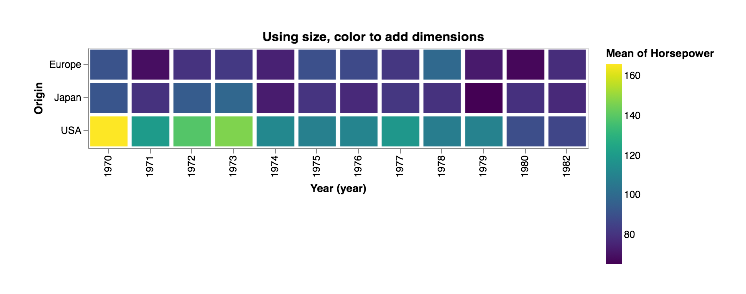

In [8]:
(alt
 .Chart(
     data=cars, 
     width=500, height=100, padding=30,
     title='Using size, color to add dimensions'
     
 )
 .mark_rect()
 .encode(
     x=alt.X('Year:O', timeUnit='year'),
     y='Origin',
     color='mean(Horsepower):Q',
     tooltip='count(Name):Q'
 )
)

---

# Compound Charts with `hconcat` and `vconcat`

In [154]:
stocks = data.stocks()
stocks.head()

symbol       date  price
0   MSFT 2000-01-01  39.81
1   MSFT 2000-02-01  36.35
2   MSFT 2000-03-01  43.22
3   MSFT 2000-04-01  28.37
4   MSFT 2000-05-01  25.45

- One Altair design pattern we'll use often is to create a **base chart** with the common elements, and 
- add together two copies with just a single change (of `mark` for example)

In [163]:
base = \
(alt
 .Chart(stocks)
 .encode(x='date:T',
         y='price:Q',
         color='symbol:N')
)

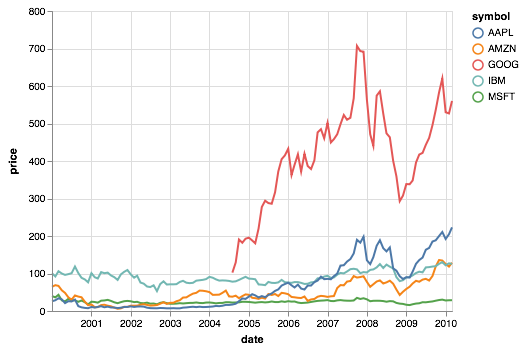

In [164]:
lines = base.mark_line()
lines

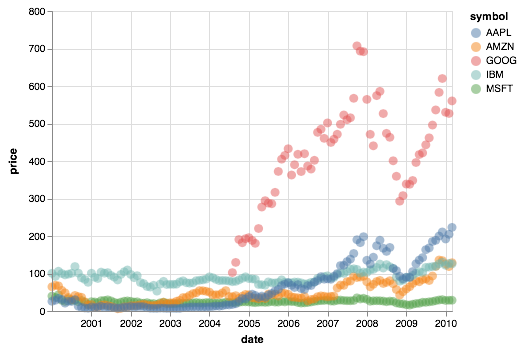

In [165]:
points = base.mark_circle(size=80, opacity=0.5)
points

### Layering

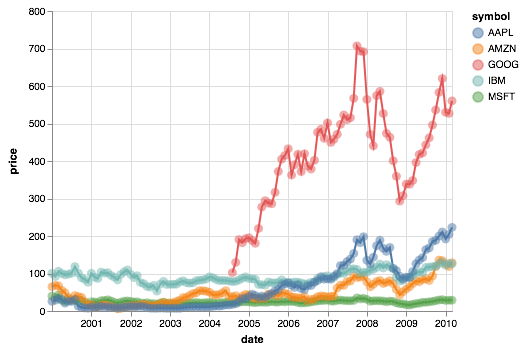

In [167]:
lines + points

# or
# alt.layer(lines, points)

### Horizontal Concatenation

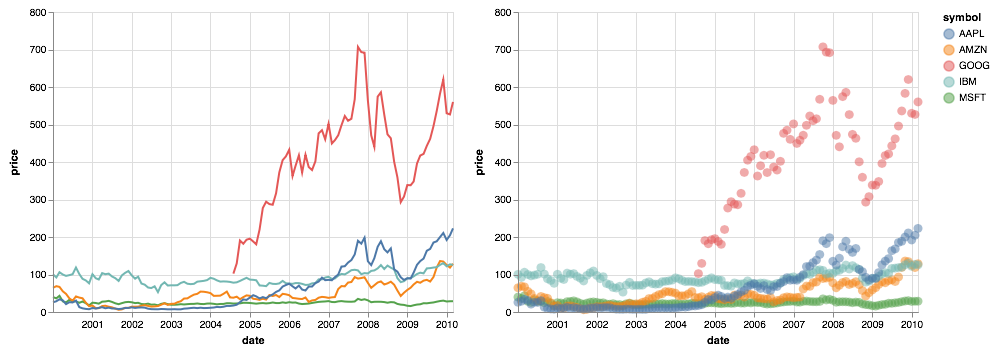

In [168]:
lines | points

# or 
# alt.hconcat(lines, points)

### Vertical Concatenation

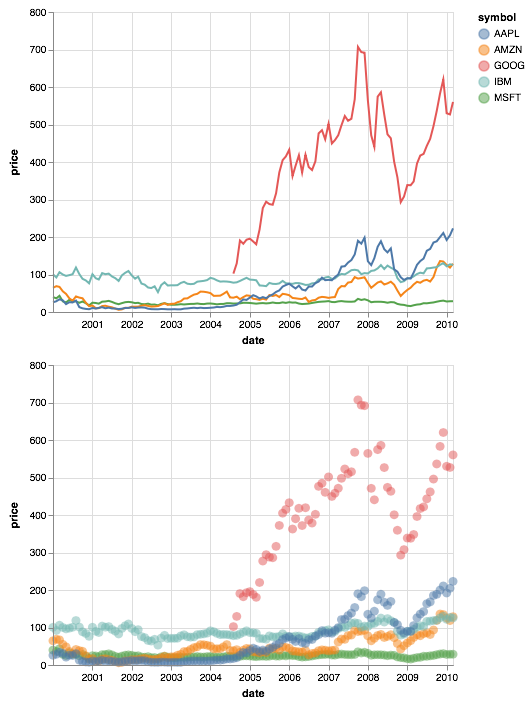

In [162]:
lines & points

# or
# alt.vconcat(lines, points)

---

# The `selection` API

- Altair comes with 3 basic selection types
    - `selection_single()` for interacting with a single element at a time.
    - `selection_multi()` for selecting multiple items at once through clicking or mouseover.
    - `selection_interval()` for selecting multiple items through a brushing interaction.
    - by specifying `encodings`, we can control whether the selection covers x, y, or both

---

## Using `Selections` and `Conditions`

- First, create a selection object with `alt.selection_*()`
    - The `empty` argument lets us control whether empty selections contain all values, or none of the values
    - Specify the encodings (`x`, `y`, `color` etc.)
    - Specify behaviour intended (with `on=` etc.)
- Then, pass it to the Chart through its `.properties()` method
- Use the selection with `alt.condition()` to power interactivity
    - The ``alt.condition`` function takes three arguments: 
        - a `selection` object, 
        - a value to be applied to points **within** the selection, and 
        - a value to be applied to points **outside** the selection.
- it automatically applies across any compound charts

In [10]:
weather = data.seattle_weather()
weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

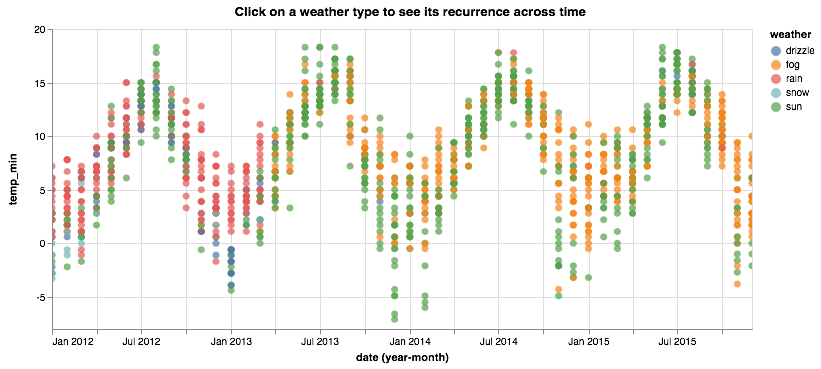

In [136]:
sel = alt.selection_single(encodings=['color'], empty='all')

base = \
(alt
 .Chart(data=weather, 
        width=700, 
        title='Click on a weather type to see its recurrence across time')
 .mark_circle(size=50)
 .encode(x=alt.X('date:T', timeUnit='yearmonth'),
         y='temp_min:Q',
         y2='temp_max:Q',
         color=alt.condition(sel, 'weather:N', alt.value('lightgray')),
         tooltip=alt.condition(sel, 'weather:N', alt.value('')))
 .properties(selection=sel)
 .interactive()
)

base

---
### Using Selections to control the x-domain of a View

- First we create and bind two charts
- Create an interval selection object
- Assign it to the Master using `properties`
- Make the Slave respond to it using `encode`

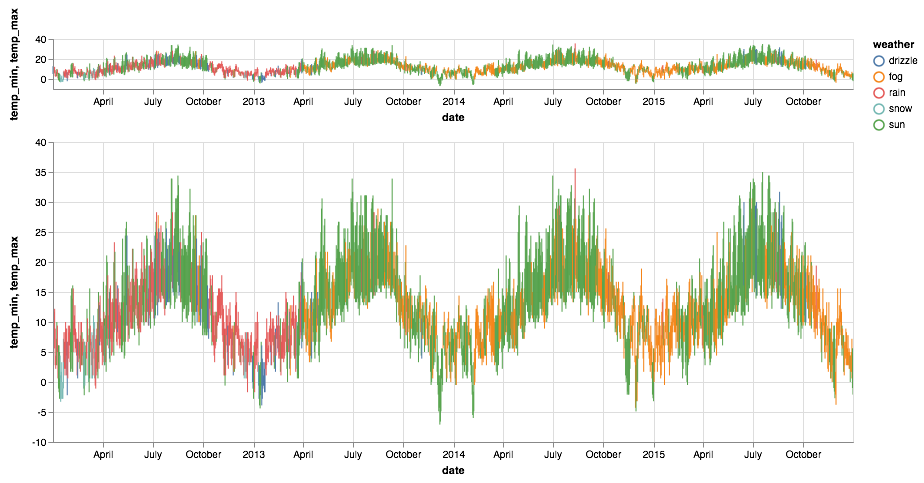

In [183]:
base = \
(alt
 .Chart(data=weather)
 .mark_rule()
 .encode(
     x='date:T',
     y='temp_min:Q',
     y2='temp_max:Q',
     color='weather:N'
 )
)

master = base.properties(width=800, height=50)
slave = base.properties(width=800, height=300)

interval = alt.selection_interval(encodings=['x'])

# Select from Master
master = master.properties(selection=interval)

# Apply to Slave
slave = slave.encode(x=alt.X('date:T', scale=alt.Scale(domain=interval.ref())))

master & slave

---
## Using Selections to filter data

### 1. Click

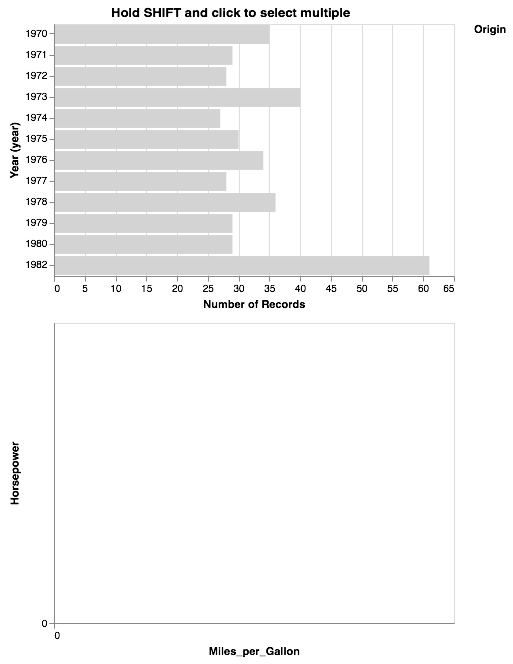

In [19]:
single = alt.selection_multi(encodings=['y'], empty='none')

master = \
(alt
 .Chart(data=cars,
        title='Hold SHIFT and click to select multiple'
       )
 .mark_bar()
 .encode(
     x='count()',
     y=alt.Y('Year:N', timeUnit='year'),
     color=alt.condition(single, alt.value('steelblue'), alt.value('lightgray'))
 )
 .properties(selection=single)
)

slave = \
(alt
 .Chart(data=cars)
 .mark_point()
 .encode(
     x='Miles_per_Gallon:Q',
     y='Horsepower:Q',
     color='Origin:N'
 )
 .transform_filter(single)
)

master & slave

### 2. Interval

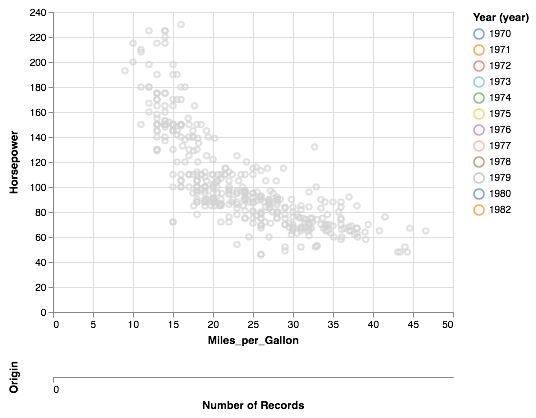

In [20]:
sel = alt.selection_interval(encodings=['x'], empty='none')

master = \
(alt
 .Chart(data=cars)
 .mark_point()
 .encode(
     x='Miles_per_Gallon:Q',
     y='Horsepower:Q',
     color=alt.condition(sel, 
                         alt.Color('Year:N', timeUnit='year'), 
                         alt.value('lightgray'))
 )
 .properties(selection=sel)
)

slave = \
(alt
 .Chart(data=cars)
 .mark_bar()
 .encode(
     x='count()',
     y='Origin'
 )
 .transform_filter(sel)
)


master & slave

---

## Interactivity by binding Widgets to Selections

- Altair has widgets like `checkbox, radio, range, select` which are exposed via the `alt.binding_*` classes
- We can create a widget object and bind it to a selection
- In the example below,
    - The slider passes a value for _year_ to the selection
    - This values is used to filter the data with the `transform_filter` method
    - 

In [151]:
gapminder = data.gapminder()
gapminder.head()

cluster      country  fertility  life_expect       pop  year
0        0  Afghanistan        7.7       30.332   8891209  1955
1        0  Afghanistan        7.7       31.997   9829450  1960
2        0  Afghanistan        7.7       34.020  10997885  1965
3        0  Afghanistan        7.7       36.088  12430623  1970
4        0  Afghanistan        7.7       38.438  14132019  1975

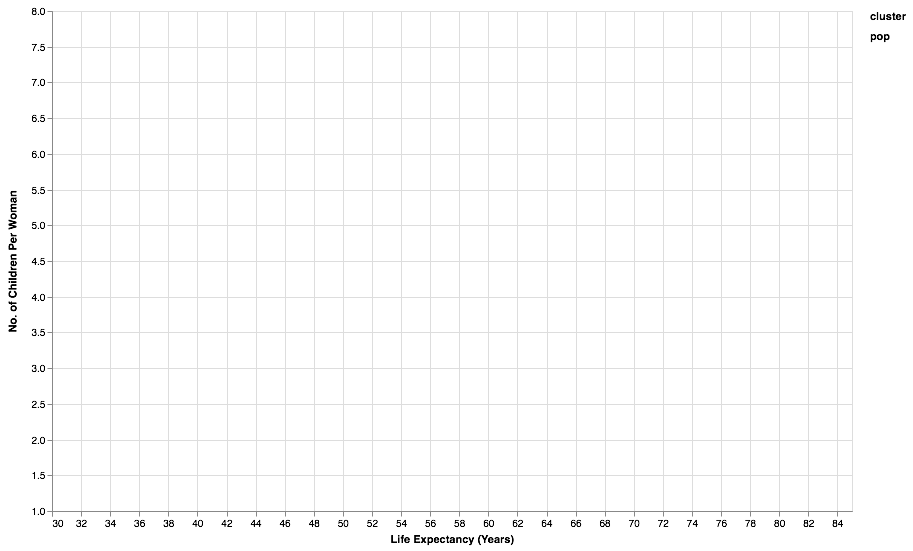

In [153]:
slider = alt.binding_range(min=1955, 
                           max=2005, 
                           step=5)

year = alt.selection_single(name="Select",
                            fields=['year'], 
                            bind=slider,
                            empty='none')

(alt
 .Chart(data=gapminder, 
        height=500,
        width=800)
 .properties(selection=year)
 .transform_filter(year.ref())
 .mark_circle()
 .encode(alt.X('life_expect:Q', 
               axis=alt.Axis(title='Life Expectancy (Years)'),
               scale=alt.Scale(zero=False, domain=(30, 85), clamp=True)),
         alt.Y('fertility:Q',
               axis=alt.Axis(title='No. of Children Per Woman'),
              scale=alt.Scale(zero=False, domain=(1, 8), clamp=True)),
         color='cluster:N',
         size='pop',
         tooltip='country:N')
)